<a href="https://colab.research.google.com/github/NikhithaVarma/ML-Algos/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

**U-Shaped**

In [2]:
from sklearn.metrics import roc_auc_score
data=pd.read_csv("ushape.csv")
data

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0
...,...,...,...
95,1.7000,0.5880,1.0
96,0.2190,-0.6530,1.0
97,0.9530,-0.4200,1.0
98,-1.3200,0.4230,0.0


In [3]:
X=data[['X','Y']].values
y=data['class'].values
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

In [4]:
x_train

array([[ 0.528  ,  0.983  ],
       [ 0.474  , -0.146  ],
       [ 1.52   , -0.0452 ],
       [ 0.195  ,  0.161  ],
       [-0.875  ,  0.505  ],
       [ 1.68   , -0.202  ],
       [ 1.03   ,  0.378  ],
       [-1.3    ,  0.184  ],
       [ 0.304  ,  0.824  ],
       [ 2.02   ,  0.123  ],
       [-0.0292 ,  0.393  ],
       [ 1.29   , -0.207  ],
       [ 0.207  , -0.0977 ],
       [-1.07   ,  0.137  ],
       [-0.747  , -0.383  ],
       [ 0.57   ,  0.337  ],
       [ 0.419  , -0.325  ],
       [ 0.321  ,  0.287  ],
       [-1.32   ,  0.423  ],
       [ 1.17   ,  0.598  ],
       [ 0.705  , -0.459  ],
       [-0.381  , -0.235  ],
       [-0.822  ,  0.631  ],
       [ 0.197  , -0.068  ],
       [ 0.124  ,  1.     ],
       [-0.237  ,  0.779  ],
       [ 1.87   , -0.0111 ],
       [ 0.219  , -0.653  ],
       [-0.597  ,  0.657  ],
       [ 2.18   , -0.7    ],
       [-0.0551 , -0.0373 ],
       [ 0.642  , -0.394  ],
       [ 0.882  , -0.0758 ],
       [ 1.92   ,  0.172  ],
       [ 0.606

In [5]:
y_test

array([0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.])

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [13]:
knn=KNeighborsClassifier(6)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.7333333333333333

In [14]:
for i in range(1,20):
  knn=KNeighborsClassifier(i)
  knn.fit(x_train,y_train)
  print("k value: ",i,"Train score: ",knn.score(x_train,y_train),"Cross validation score: ",np.mean(cross_val_score(knn,x_train,y_train,cv=10)))
  

k value:  1 Train score:  1.0 Cross validation score:  0.8714285714285713
k value:  2 Train score:  0.9285714285714286 Cross validation score:  0.8714285714285713
k value:  3 Train score:  0.9571428571428572 Cross validation score:  0.9
k value:  4 Train score:  0.9285714285714286 Cross validation score:  0.9
k value:  5 Train score:  0.9428571428571428 Cross validation score:  0.9285714285714286
k value:  6 Train score:  0.9428571428571428 Cross validation score:  0.9142857142857143
k value:  7 Train score:  0.9428571428571428 Cross validation score:  0.9142857142857143
k value:  8 Train score:  0.9285714285714286 Cross validation score:  0.9142857142857143
k value:  9 Train score:  0.9285714285714286 Cross validation score:  0.9142857142857143
k value:  10 Train score:  0.9285714285714286 Cross validation score:  0.9142857142857143
k value:  11 Train score:  0.9142857142857143 Cross validation score:  0.8714285714285716
k value:  12 Train score:  0.9142857142857143 Cross validation s

In [15]:
##from the above cv scores we have k=5 as the best
knn=KNeighborsClassifier(5)
knn.fit(x_train,y_train)
knn.score(x_test,y_test) 

0.7333333333333333

In [20]:
from mlxtend.plotting import plot_decision_regions # used to plot the decision boundary of ml algorithms

#Input :  k and data
#Output : The graph of the decision boundary
def knn_comparison(data, k): #k and the data are input to the function
  x = data[['X','Y']].values # independent features
  y = data['class'].astype(int).values # y -> target/true labels 
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)
  clf = KNeighborsClassifier(n_neighbors=k) #it will initialise the model with @neighbours as k 
  clf.fit(x_train, y_train) # train the model
  print("Train Accuracy : ", clf.score(x_train,y_train)) # test the model and it computes the accuracy (train data accuracy)
  print("Val Accuracy : ", np.mean(cross_val_score(clf, x_train, y_train, cv=10)))
  # Plotting decision region
  plot_decision_regions(x_train, y_train, clf=clf, legend=2) # it plots the decision boundary
  ##Adding axes annotations
  plt.xlabel('X') #Names the x-axis
  plt.ylabel('Y') #Names the y-axis
  plt.title('Knn with K='+ str(k)) #Names the graph
  plt.show() #Displays the graph 


1
Train Accuracy :  1.0
Val Accuracy :  0.9285714285714286


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


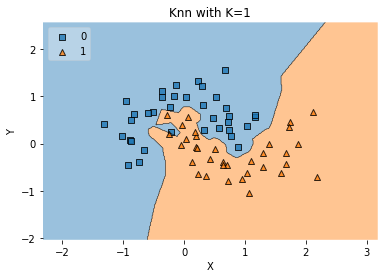

2
Train Accuracy :  0.9714285714285714
Val Accuracy :  0.8857142857142858


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


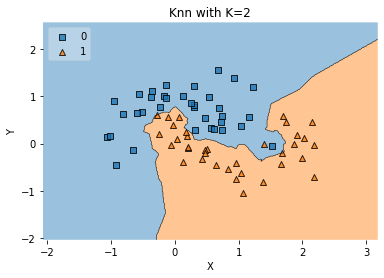

3
Train Accuracy :  0.9714285714285714
Val Accuracy :  0.9285714285714286


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


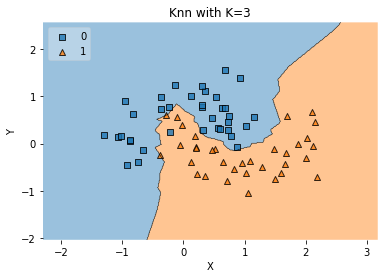

4
Train Accuracy :  0.9714285714285714
Val Accuracy :  0.9285714285714286


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


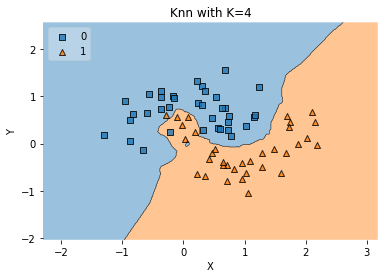

5
Train Accuracy :  0.9714285714285714
Val Accuracy :  0.9428571428571428


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


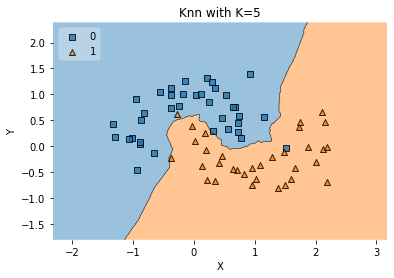

20
Train Accuracy :  0.9142857142857143
Val Accuracy :  0.8857142857142858


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


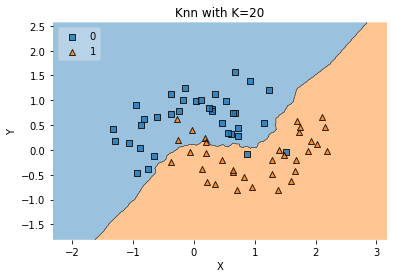

30
Train Accuracy :  0.8428571428571429
Val Accuracy :  0.7857142857142858


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


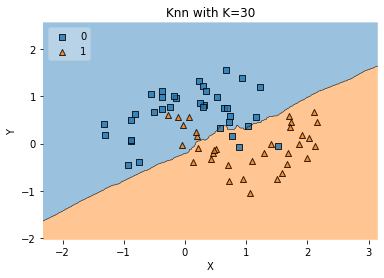

40
Train Accuracy :  0.8142857142857143
Val Accuracy :  0.7714285714285714


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


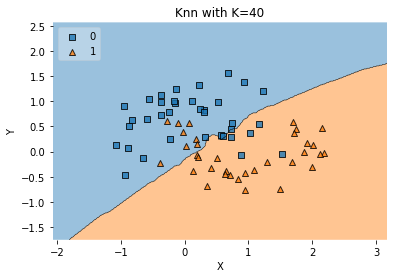

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 105, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(

70
Train Accuracy :  0.5142857142857142
Val Accuracy :  nan


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


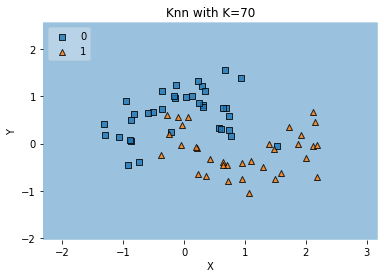

In [22]:
data1 = pd.read_csv('ushape.csv')
for i in [1,2,3,4,5,20,30,40,70]: #hit n trial
  print(i)
  knn_comparison(data1,i)

**Visualising the logistic regression decision boundary**

In [23]:
from sklearn.linear_model import LogisticRegression

def knn_no_plot(data, k): #k and the data are input to the function
  x = data[['X','Y']].values # independent features
  y = data['class'].astype(int).values # y -> target/true labels 
  clf = KNeighborsClassifier(n_neighbors=k) #it will initialise the model with @neighbours as k 
  clf.fit(x, y) # train the model
  print("K : ", k, " Train Accuracy : ", clf.score(x,y), " Val Accuracy : ", np.mean(cross_val_score(clf, x, y, cv=5)))  # test the model and it computes the accuracy (train data accuracy)
  # Plotting decision region
  # plot_decision_regions(x, y, clf=clf, legend=2) # it plots the decision boundary
  # # Adding axes annotations
  # plt.xlabel('X') #Names the x-axis
  # plt.ylabel('Y') #Names the y-axis
  # plt.title('Knn with K='+ str(k)) #Names the graph
  # plt.show() #Displays the graph 

#Same as aboe, but with logreg
def logistic(data, k = 0):
  x = data[['X','Y']].values
  y = data['class'].astype(int).values
  clf = LogisticRegression()
  clf.fit(x, y)
  print(clf.score(x,y))
  print("Train Accuracy : ", clf.score(x,y)) # test the model and it computes the accuracy (train data accuracy)
  print("Val Accuracy : ", np.mean(cross_val_score(clf, x, y, cv=5)))
  # Plotting decision region
  plot_decision_regions(x, y, clf=clf, legend=2)
  # Adding axes annotations
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Losgistic Regression decision boundary')
  plt.show()

In [24]:
data2 = pd.read_csv('linearsep.csv')
for i in [1,2,3,4,5,6,7,20,30,40,60]:
    knn_no_plot(data2, i)

K :  1  Train Accuracy :  1.0  Val Accuracy :  0.9400000000000001
K :  2  Train Accuracy :  0.97  Val Accuracy :  0.9400000000000001
K :  3  Train Accuracy :  0.97  Val Accuracy :  0.97
K :  4  Train Accuracy :  0.96  Val Accuracy :  0.95
K :  5  Train Accuracy :  0.97  Val Accuracy :  0.95
K :  6  Train Accuracy :  0.95  Val Accuracy :  0.95
K :  7  Train Accuracy :  0.96  Val Accuracy :  0.9400000000000001
K :  20  Train Accuracy :  0.95  Val Accuracy :  0.9400000000000001
K :  30  Train Accuracy :  0.94  Val Accuracy :  0.9400000000000001
K :  40  Train Accuracy :  0.94  Val Accuracy :  0.9400000000000001
K :  60  Train Accuracy :  0.95  Val Accuracy :  0.9400000000000001


0.95
Train Accuracy :  0.95
Val Accuracy :  0.95


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


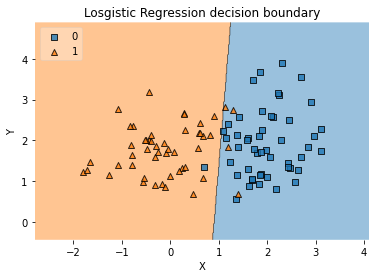

In [25]:
logistic(data2,1)